In [1]:
using OpenStreetMapX
using Downloads
using GZip
#using PythonCall
using DataFrames
using Statistics
using Plots
include("analyse.jl")
include("prepare_data.jl")

extract_points_LLA (generic function with 1 method)

Download cities

In [2]:
download_city_with_bounds("Kraków","8")
download_city_with_bounds("Brno","8")
download_city_with_bounds("Gliwice","8")

┌ Error: curl_easy_setopt: 48
│ 
│ You may be using an old system libcurl library that doesn't understand options that Julia uses. You can try the following Julia code to see which libcurl library you are using:
│ 
│     using Libdl
│     filter!(contains("curl"), dllist())
│ 
│ If this indicates that Julia is not using the libcurl library that is shipped with Julia, then that is likely to be the problem. This either means:
│ 
│   1. You are using an unofficial Julia build which is configured to use a system libcurl library that is not recent enough; you may be able to fix this by upgrading the system libcurl. You should complain to your distro maintainers for allowing Julia to use a too-old libcurl version and consider using official Julia binaries instead.
│ 
│   2. You are overriding the library load path by setting `LD_LIBRARY_PATH`, in which case you are in advanced usage territory. You can try upgrading the system libcurl, unsetting `LD_LIBRARY_PATH`, or otherwise arranging for J

"Gliwice.osm"

In [3]:
df_cracow = get_POI("Kraków.osm",nothing,"Cracow.csv")
df_brno = get_POI("Brno.osm",nothing,"Brno.csv")
df_gliwice = get_POI("Gliwice.osm",nothing,"Gliwice.csv")

Row,elemtype,elemid,nodeid,lat,lon,key,value,group,influence,range
,Symbol,Int64,Int64,Float64,Float64,String,String,Symbol,Float64,Float64
1,node,28898012,28898012,50.2874,18.6641,public_transport,stop_position,transport,5.0,300.0
2,node,29017182,29017182,50.2881,18.6603,public_transport,stop_position,transport,5.0,300.0
3,node,29092672,29092672,50.2783,18.6579,public_transport,stop_position,transport,5.0,300.0
4,node,198120498,198120498,50.2876,18.654,public_transport,stop_position,transport,5.0,300.0
5,node,198121009,198121009,50.2879,18.6545,public_transport,stop_position,transport,5.0,300.0
6,node,198122611,198122611,50.2969,18.6588,public_transport,stop_position,transport,5.0,300.0
7,node,198122619,198122619,50.2964,18.6571,public_transport,stop_position,transport,5.0,300.0
8,node,198122622,198122622,50.2965,18.6591,public_transport,stop_position,transport,5.0,300.0
9,node,198126072,198126072,50.3431,18.6511,public_transport,stop_position,transport,5.0,300.0


In [4]:
download_boundaries_file("Kraków")
krakow_boundaries = extract_points_LLA("Kraków_boundaries.osm")
download_boundaries_file("Brno")
brno_boundaries = extract_points_LLA("Brno_boundaries.osm")
download_boundaries_file("Gliwice")
gliwice_boundaries = extract_points_LLA("Gliwice_boundaries.osm")

Row,adminname,wayid,nodes,x,y
,String,Int64,Int64,Float64,Float64
1,Gliwice,118382949,2411512341,18.7358,50.2708
2,Gliwice,118382949,3832301779,18.7356,50.271
3,Gliwice,118382949,3832298885,18.7356,50.271
4,Gliwice,118382949,3832305059,18.7356,50.271
5,Gliwice,118382949,3832298886,18.7355,50.271
6,Gliwice,118382949,1331392995,18.7354,50.2711
7,Gliwice,118382949,1331392992,18.7349,50.2712
8,Gliwice,118382949,3832302561,18.7348,50.2712
9,Gliwice,118382949,3832299413,18.7343,50.2715


In [5]:
search_area = 300

300

In [6]:
center_cracow = LLA(50.061692315544654, 19.939496620660737)
center_brno = LLA(49.196664523003115, 16.60804112914713)
center_gliwice = LLA(50.29388096424714, 18.66566269980933)
ix_cracow = AttractivenessSpatIndex(df_cracow,get_range=a->search_area)
ix_brno = AttractivenessSpatIndex(df_brno,get_range=a->search_area)
ix_gliwice = AttractivenessSpatIndex(df_gliwice,get_range=a->search_area)

AttractivenessSpatIndex{AttractivenessMetaPOI, typeof(get_attractiveness_group)}(SpatialIndexing.RTree{Float64, 2, SpatialIndexing.SpatialElem{Float64, 2, Int64, OSMToolset.AttractivenessData{AttractivenessMetaPOI}}}(variant=RTreeStar, tight_mbrs=true, nearmin_overlap=32, fill_factor=0.7, split_factor=0.4, reinsert_factor=0.3, leaf_capacity=100, branch_capacity=100)
6453 element(s) in 2 level(s) (1, 65 node(s) per level):
 level=2 nchildren=65 mbr=((-9319.832009483549, -7482.9512014799), (7404.315355546654, 10720.871856087871)), 6453×10 DataFrame
  Row │ elemtype  elemid     nodeid       lat      lon      key                ⋯
      │ Symbol    Int64      Int64        Float64  Float64  String             ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ node       28898012     28898012  50.2874  18.6641  public_transport   ⋯
    2 │ node       29017182     29017182  50.2881  18.6603  public_transport
    3 │ node       29092672     29092672  50.2

In [7]:
num_of_sectors = 20
distance = 500
num_of_points = 100

100

In [8]:
cracow_boundaries_lats = krakow_boundaries.y   
cracow_boundaries_lons = krakow_boundaries.x   
brno_boundaries_lats = brno_boundaries.y   
brno_boundaries_lons = brno_boundaries.x   
gliwice_boundaries_lats = gliwice_boundaries.y   
gliwice_boundaries_lons = gliwice_boundaries.x   
points_cracow = generate_sectors(num_of_sectors,distance,center_cracow,num_of_points,
                                cracow_boundaries_lats,cracow_boundaries_lons)
points_brno = generate_sectors(num_of_sectors,distance,center_brno,num_of_points,
                                brno_boundaries_lats,brno_boundaries_lons)
points_gliwice = generate_sectors(num_of_sectors,distance,center_gliwice,num_of_points,
                                gliwice_boundaries_lats,gliwice_boundaries_lons)

20×100 Matrix{LLA}:
 LLA(50.2942, 18.6727, 0.0195595)  …  LLA(50.2939, 18.6727, 0.0195593)
 LLA(50.2944, 18.6797, 0.0782382)     LLA(50.2939, 18.6797, 0.0782373)
 LLA(50.2947, 18.6867, 0.176036)      LLA(50.2939, 18.6867, 0.176034)
 LLA(50.295, 18.6937, 0.312953)       LLA(50.2939, 18.6937, 0.312949)
 LLA(50.2953, 18.7007, 0.488989)      LLA(50.2939, 18.7007, 0.488983)
 LLA(50.2956, 18.7077, 0.704144)   …  LLA(50.2939, 18.7078, 0.704136)
 LLA(50.2958, 18.7147, 0.958418)      LLA(50.2939, 18.7148, 0.958407)
 LLA(50.2961, 18.7217, 1.25181)       LLA(50.2939, 18.7218, 1.2518)
 LLA(50.2964, 18.7287, 1.58432)       LLA(50.2939, 18.7288, 1.58431)
 LLA(0.0, 0.0, 0.0)                   LLA(50.2939, 18.7358, 1.95593)
 LLA(0.0, 0.0, 0.0)                …  LLA(50.2939, 18.7428, 2.36668)
 LLA(0.0, 0.0, 0.0)                   LLA(50.2939, 18.7499, 2.81654)
 LLA(0.0, 0.0, 0.0)                   LLA(0.0, 0.0, 0.0)
 LLA(0.0, 0.0, 0.0)                   LLA(0.0, 0.0, 0.0)
 LLA(0.0, 0.0, 0.0)           

In [9]:
attr = :shopping
attr_cracow = calculate_attractiveness_of_sector(points_cracow,ix_cracow,attr)
attr_brno = calculate_attractiveness_of_sector(points_brno,ix_brno,attr)
attr_gliwice = calculate_attractiveness_of_sector(points_gliwice,ix_gliwice,attr)

20-element Vector{Float64}:
 149.07796061174494
  20.477478072880448
   5.3088456325684845
   4.201142324847449
   0.772212669184462
   5.12351809431452
   1.466965530315862
   1.0183377209962825
   0.5482247650898612
   0.35633416826447173
   0.6962562483276327
   0.6195714198748015
   0.9375107570119927
   0.06957944688675634
   0.07057881100209709
   0.17218251330006407
   0.0
   0.0
   0.0
   0.0

In [10]:
stand_cracow = min_max_scaling(attr_cracow)
stand_brno = min_max_scaling(attr_brno)
stand_gliwice = min_max_scaling(attr_gliwice)

20-element Vector{Float64}:
 1.0
 0.13736086802402334
 0.03561120376736783
 0.028180841135792053
 0.005179925094330973
 0.0343680452381428
 0.009840257569235145
 0.00683090724354901
 0.0036774367105654507
 0.002390253843037871
 0.00467041704535351
 0.00415602291131684
 0.006288728080025344
 0.00046673194750743456
 0.00047343558170822344
 0.0011549830209207923
 0.0
 0.0
 0.0
 0.0

In [11]:
x_axis = [i*distance for i in 1:num_of_sectors]./1000

20-element Vector{Float64}:
  0.5
  1.0
  1.5
  2.0
  2.5
  3.0
  3.5
  4.0
  4.5
  5.0
  5.5
  6.0
  6.5
  7.0
  7.5
  8.0
  8.5
  9.0
  9.5
 10.0

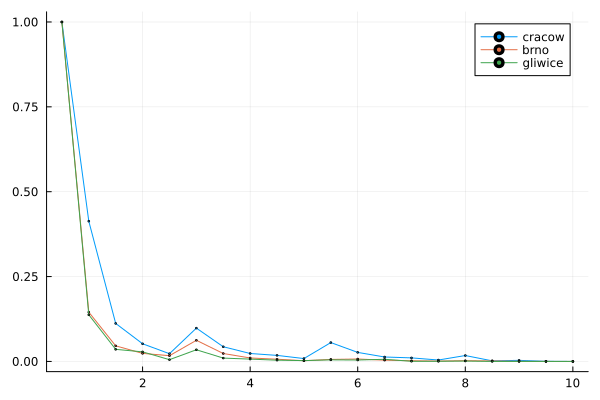

In [12]:
plotconfig = (marker=:circle, markersize=1)
cities = [stand_cracow, stand_brno,stand_gliwice]
labels = ["cracow" "brno" "gliwice"]
#This spike looks odd - I'm currently investigating its cause
plot(x_axis,cities, labels = labels; plotconfig...)